In [ ]:
!pip install keras-ocr

     |████████████████████████████████| 61kB 5.1MB/s 
     |████████████████████████████████| 9.5MB 12.0MB/s 
     |████████████████████████████████| 860kB 35.7MB/s 
     |████████████████████████████████| 133kB 53.2MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
  Created wheel for keras-ocr: filename=keras_ocr-0.8.6-cp37-none-any.whl size=42937 sha256=50e89697fd45bc908e7f5c46bd2dae9b6e554cf90576623beb186004cd5a2f7d
  Stored in directory: /root/.cache/pip/wheels/79/59/e6/79dd15333b911d51ea68d7e4c325e14f042eacc141201dca44
Successfully built keras-ocr


In [ ]:
import random
import string
import math
import itertools
import os

import numpy as np
import imgaug
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.model_selection

import keras_ocr

train_labels = keras_ocr.datasets.get_born_digital_recognizer_dataset(
    split='train',
    cache_dir='.'
)
test_labels = keras_ocr.datasets.get_born_digital_recognizer_dataset(
    split='test',
    cache_dir='.'
)
train_labels = [(filepath, box, word.lower()) for filepath, box, word in train_labels]
test_labels = [(filepath, box, word.lower()) for filepath, box, word in test_labels]

Looking for ./borndigital/Challenge1_Training_Task3_Images_GT.zip
Looking for ./borndigital/Challenge1_Test_Task3_Images.zip
Looking for ./borndigital/test/Challenge1_Test_Task3_GT.txt


In [ ]:
train_labels

[('./borndigital/train/word_1.png', None, 'flying'),
 ('./borndigital/train/word_2.png', None, 'today'),
 ('./borndigital/train/word_3.png', None, 'means'),
 ('./borndigital/train/word_4.png', None, 'vueling'),
 ('./borndigital/train/word_5.png', None, 'get'),
 ('./borndigital/train/word_6.png', None, 'away,'),
 ('./borndigital/train/word_7.png', None, '1.000.000'),
 ('./borndigital/train/word_8.png', None, 'seats'),
 ('./borndigital/train/word_9.png', None, 'from'),
 ('./borndigital/train/word_10.png', None, '30€'),
 ('./borndigital/train/word_11.png', None, 'book'),
 ('./borndigital/train/word_12.png', None, 'now!'),
 ('./borndigital/train/word_13.png', None, 'smi'),
 ('./borndigital/train/word_14.png', None, 'sensomotoric'),
 ('./borndigital/train/word_15.png', None, 'instruments'),
 ('./borndigital/train/word_16.png', None, 'newsletter'),
 ('./borndigital/train/word_17.png', None, 'click'),
 ('./borndigital/train/word_18.png', None, 'play'),
 ('./borndigital/train/word_19.png', Non

In [ ]:
recognizer = keras_ocr.recognition.Recognizer()
recognizer.compile()

Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
batch_size = 8
augmenter = imgaug.augmenters.Sequential([
    imgaug.augmenters.GammaContrast(gamma=(0.25, 3.0)),
])

train_labels, validation_labels = sklearn.model_selection.train_test_split(train_labels, test_size=0.2, random_state=42)
(training_image_gen, training_steps), (validation_image_gen, validation_steps) = [
    (
        keras_ocr.datasets.get_recognizer_image_generator(
            labels=labels,
            height=recognizer.model.input_shape[1],
            width=recognizer.model.input_shape[2],
            alphabet=recognizer.alphabet,
            augmenter=augmenter
        ),
        len(labels) // batch_size
    ) for labels, augmenter in [(train_labels, augmenter), (validation_labels, None)]
]
training_gen, validation_gen = [
    recognizer.get_batch_generator(
        image_generator=image_generator,
        batch_size=batch_size
    )
    for image_generator in [training_image_gen, validation_image_gen]
]

482 / 2853 instances have illegal characters.
text: premier


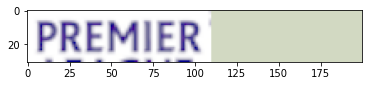

In [ ]:
image, text = next(training_image_gen)
print('text:', text)
plt.imshow(image)

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, restore_best_weights=False),
    tf.keras.callbacks.ModelCheckpoint('recognizer_borndigital.h5', monitor='val_loss', save_best_only=True),
    tf.keras.callbacks.CSVLogger('recognizer_borndigital.csv')
]
recognizer.training_model.fit_generator(
    generator=training_gen,
    steps_per_epoch=training_steps,
    validation_steps=validation_steps,
    validation_data=validation_gen,
    callbacks=callbacks,
    epochs=1000,
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/1000
 30/356 [=>............................] - ETA: 19s - loss: 5.7957

KeyboardInterrupt: ignored

Predicted: developer, Actual: developer


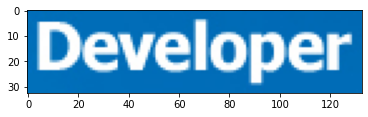

In [ ]:
image_filepath, _, actual = test_labels[1]
predicted = recognizer.recognize(image_filepath)
print(f'Predicted: {predicted}, Actual: {actual}')
_ = plt.imshow(keras_ocr.tools.read(image_filepath))

### license plate recognition 데이터셋에 맞게 CRNN 파라미터 Fine-Tuning

Reference : https://github.com/faustomorales/keras-ocr/blob/master/keras_ocr/datasets.py#L102 


In [ ]:
train_labels

[('./borndigital/train/word_142.png', None, 'cool'),
 ('./borndigital/train/word_1868.png', None, 'stability'),
 ('./borndigital/train/word_666.png', None, 'bed'),
 ('./borndigital/train/word_782.png', None, 'communications'),
 ('./borndigital/train/word_2841.png', None, 'summer'),
 ('./borndigital/train/word_655.png', None, 'bed'),
 ('./borndigital/train/word_472.png', None, 'abc'),
 ('./borndigital/train/word_1393.png', None, 'hull'),
 ('./borndigital/train/word_1458.png', None, 'last'),
 ('./borndigital/train/word_3266.png', None, '€59'),
 ('./borndigital/train/word_804.png', None, 'demo'),
 ('./borndigital/train/word_2646.png', None, 'twitter'),
 ('./borndigital/train/word_1906.png', None, 'out'),
 ('./borndigital/train/word_3159.png', None, 'adventure'),
 ('./borndigital/train/word_1164.png', None, 'pack'),
 ('./borndigital/train/word_196.png', None, 'star'),
 ('./borndigital/train/word_533.png', None, 'and'),
 ('./borndigital/train/word_1331.png', None, 'support,'),
 ('./borndigi

In [ ]:
type(train_labels)

list

In [ ]:
train_labels[0]

('./borndigital/train/word_142.png', None, 'cool')

In [ ]:
type(train_labels[0])

tuple

In [ ]:
!unzip license_plate_ocr_data.zip

Archive:  license_plate_ocr_data.zip
   creating: license_plate_ocr_data/
  inflating: license_plate_ocr_data/groundtruth.csv  
   creating: license_plate_ocr_data/images/
  inflating: license_plate_ocr_data/images/ak1165.png  
  inflating: license_plate_ocr_data/images/ak399.png  
  inflating: license_plate_ocr_data/images/ak721.png  
  inflating: license_plate_ocr_data/images/ak848.png  
  inflating: license_plate_ocr_data/images/al1156.png  
  inflating: license_plate_ocr_data/images/al1181.png  
  inflating: license_plate_ocr_data/images/al1204.png  
  inflating: license_plate_ocr_data/images/al1247.png  
  inflating: license_plate_ocr_data/images/al1259.png  
  inflating: license_plate_ocr_data/images/al145.png  
  inflating: license_plate_ocr_data/images/al1528.png  
  inflating: license_plate_ocr_data/images/al1662.png  
  inflating: license_plate_ocr_data/images/al47.png  
  inflating: license_plate_ocr_data/images/ar1097.png  
  inflating: license_plate_ocr_data/images/ar1258.

In [ ]:
def _read_licenseplate_labels_file(labels_filepath, image_folder):
  """Read a labels file and return (filepath, label) tuples.
  Args:
      labels_filepath: Path to labels file
      image_folder: Path to folder containing images
  """
  with open(labels_filepath, encoding='utf-8-sig') as f:
    labels = [l.strip().split(',') for l in f.readlines()]
    labels = [(os.path.join(image_folder, segments[0]), None, segments[2]) for segments in labels]
  return labels

In [ ]:
def get_licenseplate_recognizer_dataset(cache_dir=None):
  """Get a list of (filepath, box, word) tuples from the
  BornDigital dataset. This dataset comes pre-cropped so
  `box` is always `None`.
  Args:
      split: Which split to get (train, test, or traintest)
      cache_dir: The directory in which to cache the file. The default is
          `~/.keras-ocr`.
  Returns:
      A recognition dataset as a list of (filepath, box, word) tuples
  """
  if cache_dir == None:
    raise ValueError('cache_dir is None')

  data = []
  main_dir = os.path.join(cache_dir, 'license_plate_ocr_data')
  train_dir = os.path.join(main_dir, 'images')
  data.extend(
    _read_licenseplate_labels_file(labels_filepath=os.path.join(main_dir, 'groundtruth.csv'),
                                   image_folder=train_dir))
  return data

In [ ]:
train_labels = get_licenseplate_recognizer_dataset(cache_dir='.')
train_labels = [(filepath, box, word.lower()) for filepath, box, word in train_labels]

In [ ]:
train_labels

[('./license_plate_ocr_data/images/ak1165.png', None, 'fuw999'),
 ('./license_plate_ocr_data/images/ak399.png', None, 'fgj235'),
 ('./license_plate_ocr_data/images/ak721.png', None, 'fhg521'),
 ('./license_plate_ocr_data/images/ak848.png', None, 'fpj331'),
 ('./license_plate_ocr_data/images/al1156.png', None, '6a5730a'),
 ('./license_plate_ocr_data/images/al1181.png', None, '26a178n'),
 ('./license_plate_ocr_data/images/al1204.png', None, '9a9990a'),
 ('./license_plate_ocr_data/images/al1247.png', None, '47a434f'),
 ('./license_plate_ocr_data/images/al1259.png', None, 'kaa20c'),
 ('./license_plate_ocr_data/images/al145.png', None, '47a8d4c'),
 ('./license_plate_ocr_data/images/al1528.png', None, '1g3296b'),
 ('./license_plate_ocr_data/images/al1662.png', None, '2a3633a'),
 ('./license_plate_ocr_data/images/al47.png', None, '2a9043j'),
 ('./license_plate_ocr_data/images/ar1097.png', None, 'uni'),
 ('./license_plate_ocr_data/images/ar1258.png', None, '541axy'),
 ('./license_plate_ocr_dat

### Recognizer 옵션 설정

In [ ]:
BUILD_PARAMS = {
    'height': 31,
    'width': 200,
    'color': False,
    'filters': (64, 128, 256, 256, 512, 512, 512),
    'rnn_units': (128, 128),
    'dropout': 0.25,
    'rnn_steps_to_discard': 2,
    'pool_size': 2,
    'stn': True,
}

DEFAULT_ALPHABET = string.digits + string.ascii_lowercase

In [ ]:
recognizer = keras_ocr.recognition.Recognizer(alphabet=DEFAULT_ALPHABET, weights='kurapan', build_params=BUILD_PARAMS)
# restore model weights
loading_model_path = os.path.join('.', 'recognizer_carplate.h5')
if os.path.isfile(loading_model_path) == True:
  recognizer.model.load_weights(loading_model_path)
  print(loading_model_path + ' model loaded!')
recognizer.compile()

Looking for /root/.keras-ocr/crnn_kurapan.h5
./recognizer_carplate.h5 model loaded!


In [ ]:
batch_size = 8

# data augmentation
augmenter = imgaug.augmenters.Sequential([
  imgaug.augmenters.GammaContrast(gamma=(0.25, 3.0)),
])

train_labels, validation_labels = sklearn.model_selection.train_test_split(train_labels, test_size=0.2, random_state=42)
(training_image_gen, training_steps), (validation_image_gen, validation_steps) = [
(
  keras_ocr.datasets.get_recognizer_image_generator(
    labels=labels,
    height=recognizer.model.input_shape[1],
    width=recognizer.model.input_shape[2],
    alphabet=recognizer.alphabet,
    augmenter=augmenter
  ),
  len(labels) // batch_size
) for labels, augmenter in [(train_labels, augmenter), (validation_labels, None)]
]
training_gen, validation_gen = [
recognizer.get_batch_generator(
  image_generator=image_generator,
  batch_size=batch_size
)
for image_generator in [training_image_gen, validation_image_gen]
]

In [ ]:
validation_labels

[('./license_plate_ocr_data/images/nj754.png', None, 'uaa47c'),
 ('./license_plate_ocr_data/images/mn764.png', None, 'bt000'),
 ('./license_plate_ocr_data/images/fl26.png', None, '615kpi'),
 ('./license_plate_ocr_data/images/ky729.png', None, '547kpe'),
 ('./license_plate_ocr_data/images/md178.png', None, '0'),
 ('./license_plate_ocr_data/images/wi301.png', None, '704bbj'),
 ('./license_plate_ocr_data/images/mi242.png', None, 'g0lfing'),
 ('./license_plate_ocr_data/images/hi503.png', None, 'kab277'),
 ('./license_plate_ocr_data/images/oh200.png', None, 'dis6847'),
 ('./license_plate_ocr_data/images/wy1093.png', None, '299yx'),
 ('./license_plate_ocr_data/images/dc106.png', None, 'ba0523'),
 ('./license_plate_ocr_data/images/md645.png', None, 'a075307'),
 ('./license_plate_ocr_data/images/ma246.png', None, '4280'),
 ('./license_plate_ocr_data/images/wy658.png', None, '4475'),
 ('./license_plate_ocr_data/images/il1200.png', None, 'pltfrm'),
 ('./license_plate_ocr_data/images/la405.png', 

text: 20fy20


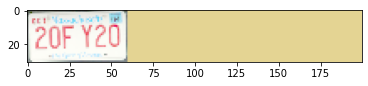

In [ ]:
# draw one sample training image for sanity check
image, text = next(training_image_gen)
print('text:', text)
plt.imshow(image)

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('recognizer_carplate.h5', monitor='val_loss', save_best_only=True),
    tf.keras.callbacks.CSVLogger('recognizer_carplate.csv')
]
recognizer.training_model.fit_generator(
    generator=training_gen,
    steps_per_epoch=training_steps,
    validation_steps=validation_steps,
    validation_data=validation_gen,
    callbacks=callbacks,
    epochs=1000,
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/1000
75/75 [==============================] - 14s 92ms/step - loss: 14.6484 - val_loss: 7.7246
Epoch 2/1000
75/75 [==============================] - 5s 69ms/step - loss: 5.1692 - val_loss: 6.2852
Epoch 3/1000
75/75 [==============================] - 5s 70ms/step - loss: 3.5632 - val_loss: 4.0993
Epoch 4/1000
75/75 [==============================] - 5s 69ms/step - loss: 2.9120 - val_loss: 4.6103
Epoch 5/1000
75/75 [==============================] - 5s 68ms/step - loss: 2.3916 - val_loss: 4.4589
Epoch 6/1000
75/75 [==============================] - 5s 69ms/step - loss: 2.0601 - val_loss: 4.4009
Epoch 7/1000
75/75 [==============================] - 5s 69ms/step - loss: 1.6279 - val_loss: 3.3345
Epoch 8/1000
75/75 [==============================] - 5s 68ms/step - loss: 1.1902 - val_loss: 4.5840
Epoch 9/1000
75/75 [==============================] - 5s 69ms/step - loss: 1.1996 - val_loss: 3.8835
Epoch 10/1000
75/75 [==============================] - 5s 69ms/step - loss: 1.0327 - val_

KeyboardInterrupt: ignored

In [ ]:
from google.colab import files
files.download("/content/recognizer_carplate.h5")

In [ ]:
files.download("/content/recognizer_carplate.csv")

Predicted: ua47c, Actual: uaa47c


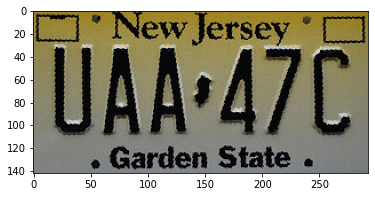

In [ ]:
image_filepath, _, actual = validation_labels[0]
predicted = recognizer.recognize(image_filepath)
print(f'Predicted: {predicted}, Actual: {actual}')
_ = plt.imshow(keras_ocr.tools.read(image_filepath))

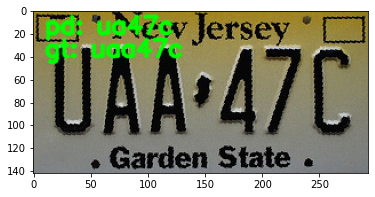

In [ ]:
import cv2

image = keras_ocr.tools.read(image_filepath)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image, f'gt: {actual}', (10,40), font, 0.7, (0, 255, 0), 2, cv2.LINE_AA)
cv2.putText(image, f'pd: {predicted}', (10,20), font, 0.7, (0, 255, 0), 2, cv2.LINE_AA)
plt.imshow(image)

In [ ]:
!mkdir crnn_license_plate_validation_result

In [ ]:
validation_labels

[('./license_plate_ocr_data/images/nj754.png', None, 'uaa47c'),
 ('./license_plate_ocr_data/images/mn764.png', None, 'bt000'),
 ('./license_plate_ocr_data/images/fl26.png', None, '615kpi'),
 ('./license_plate_ocr_data/images/ky729.png', None, '547kpe'),
 ('./license_plate_ocr_data/images/md178.png', None, '0'),
 ('./license_plate_ocr_data/images/wi301.png', None, '704bbj'),
 ('./license_plate_ocr_data/images/mi242.png', None, 'g0lfing'),
 ('./license_plate_ocr_data/images/hi503.png', None, 'kab277'),
 ('./license_plate_ocr_data/images/oh200.png', None, 'dis6847'),
 ('./license_plate_ocr_data/images/wy1093.png', None, '299yx'),
 ('./license_plate_ocr_data/images/dc106.png', None, 'ba0523'),
 ('./license_plate_ocr_data/images/md645.png', None, 'a075307'),
 ('./license_plate_ocr_data/images/ma246.png', None, '4280'),
 ('./license_plate_ocr_data/images/wy658.png', None, '4475'),
 ('./license_plate_ocr_data/images/il1200.png', None, 'pltfrm'),
 ('./license_plate_ocr_data/images/la405.png', 

In [ ]:
import imageio
s
output_folder = 'crnn_license_plate_validation_result'

for image_path, _, actual in validation_labels:
    predicted = recognizer.recognize(image_path)

    output_image_path = os.path.join(output_folder, image_path.split('/')[-1])

    image = keras_ocr.tools.read(image_path)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(image, f'gt: {actual}', (10,40), font, 0.7, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.putText(image, f'pd: {predicted}', (10,20), font, 0.7, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imwrite(output_image_path, image)

In [ ]:
!zip -r /content/crnn_license_plate_validation_result.zip /content/crnn_license_plate_validation_result

  adding: content/crnn_license_plate_validation_result/ (stored 0%)
  adding: content/crnn_license_plate_validation_result/az1429.png (deflated 0%)
  adding: content/crnn_license_plate_validation_result/de1254.png (deflated 0%)
  adding: content/crnn_license_plate_validation_result/il1200.png (deflated 2%)
  adding: content/crnn_license_plate_validation_result/sd983.png (deflated 0%)
  adding: content/crnn_license_plate_validation_result/wy1235.png (deflated 1%)
  adding: content/crnn_license_plate_validation_result/me1518.png (deflated 1%)
  adding: content/crnn_license_plate_validation_result/nh247.png (deflated 1%)
  adding: content/crnn_license_plate_validation_result/mo1654.png (deflated 0%)
  adding: content/crnn_license_plate_validation_result/wa1239.png (stored 0%)
  adding: content/crnn_license_plate_validation_result/ia537.png (deflated 0%)
  adding: content/crnn_license_plate_validation_result/co818.png (deflated 0%)
  adding: content/crnn_license_plate_validation_result/mn1

In [ ]:
from google.colab import files
files.download("/content/crnn_license_plate_validation_result.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>